In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [7]:
 # Load the data
data = pd.read_csv('../data/world.csv', decimal=',')

# Display basic info
print(data.info())
print(data.describe())

# Handling missing values by dropping them (you might choose a different approach)
data = data.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

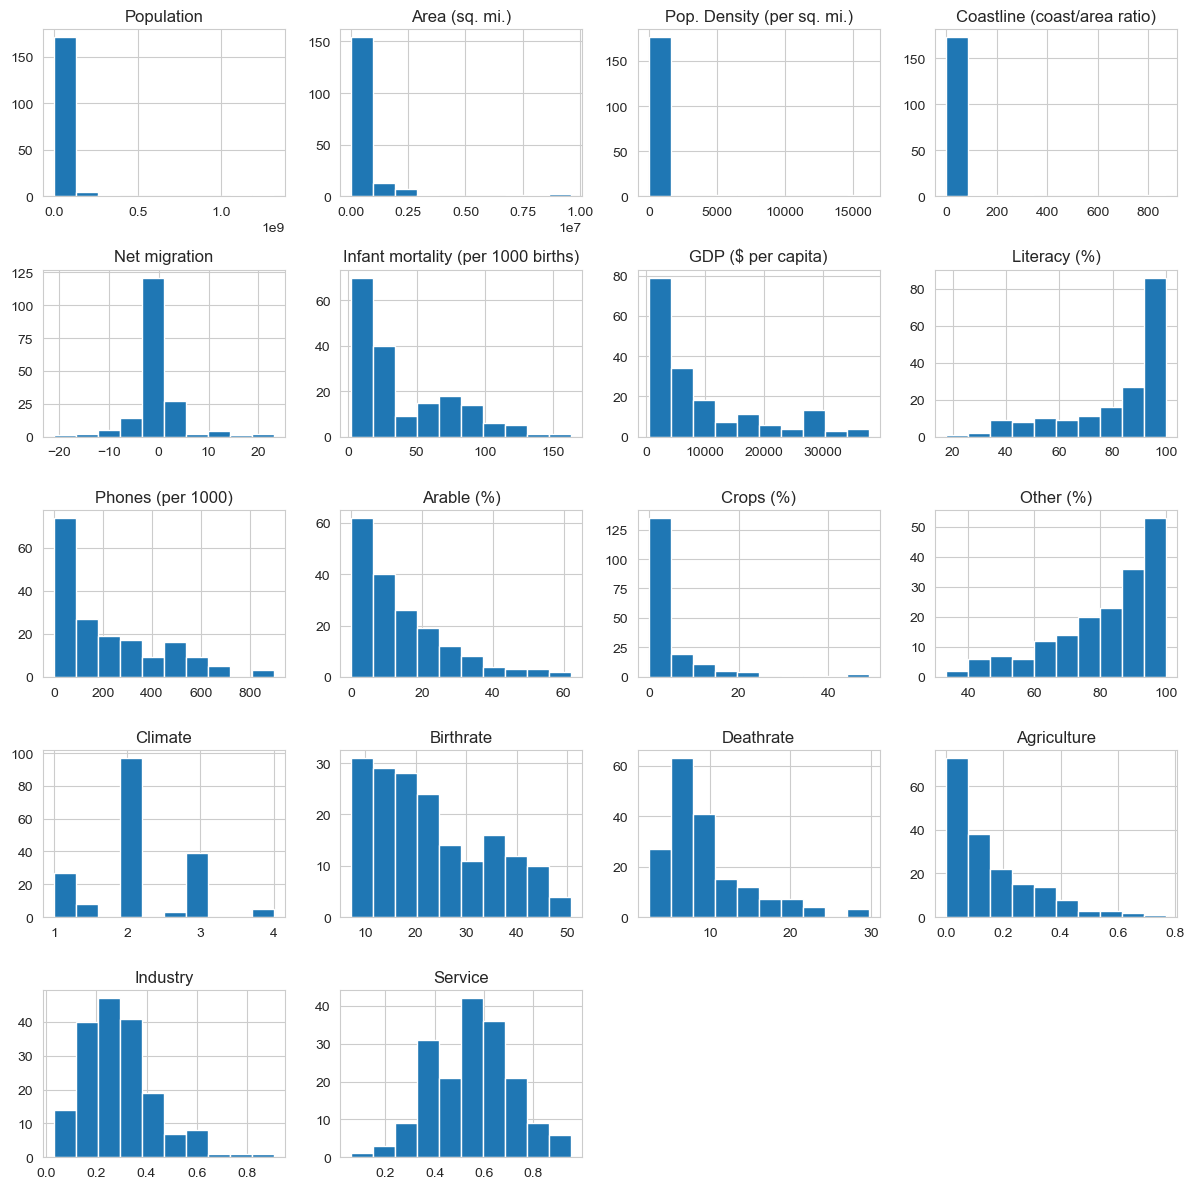

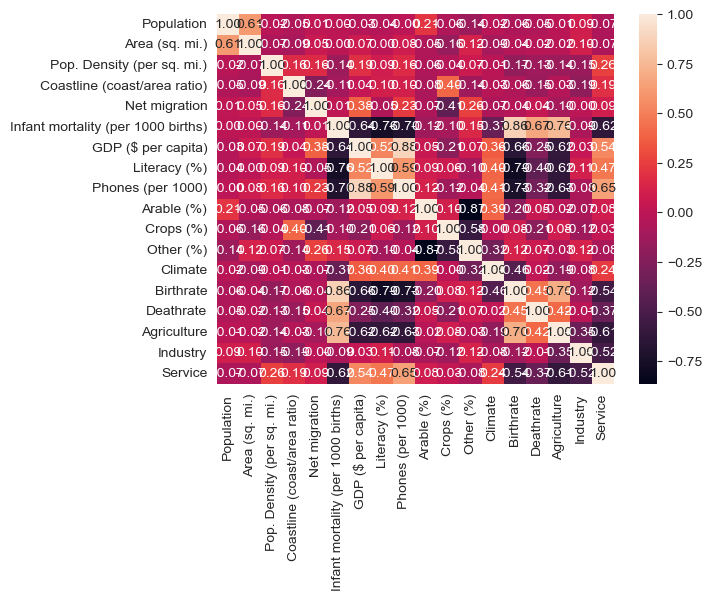

In [8]:
# EDA: Visualization
# Histograms
data.hist(figsize=(12, 12))
plt.tight_layout()  # Adjusts the plots to ensure they don't overlap
plt.show()

# Correlation Matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

/Users/Ihor_Perepecha/.conda/envs/Metadata-Generator/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Ihor_Perepecha/.conda/envs/Metadata-Generator/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Ihor_Perepecha/.conda/envs/Metadata-Generator/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Ihor_Perepecha/.conda/envs/Metadata-Generator/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from

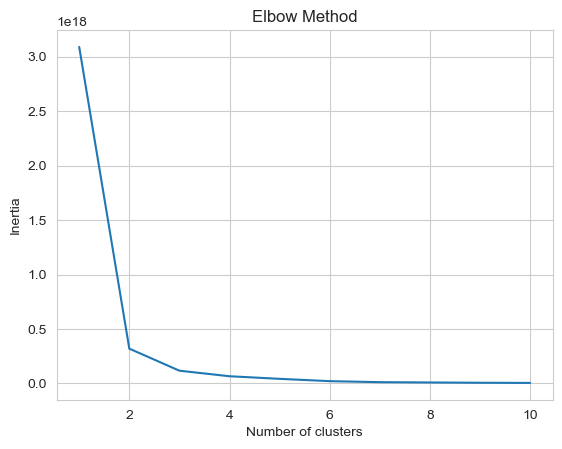

In [9]:

# Clustering (Using KMeans as an example)
# Selecting columns for clustering, you might select others based on your goal
columns_to_cluster = ['Population', 'GDP ($ per capita)', 'Literacy (%)']
X = data[columns_to_cluster]

# Finding the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [10]:

# Let's assume the optimal number of clusters is 3 and perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Adding the cluster labels for each country in the dataset
data['Cluster'] = kmeans.labels_

# Displaying the data with the cluster labels
print(data[['Country', 'Cluster']])

# You can further analyze and visualize the clusters to gain more insights.

                Country  Cluster
0          Afghanistan         0
1              Albania         0
2              Algeria         0
6             Anguilla         0
7    Antigua & Barbuda         0
..                  ...      ...
218          Venezuela         0
219            Vietnam         0
224              Yemen         0
225             Zambia         0
226           Zimbabwe         0

[179 rows x 2 columns]


/Users/Ihor_Perepecha/.conda/envs/Metadata-Generator/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
